# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [1]:
pip install - -upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\ProgramData\Anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


### Restart the kernel to import the module and access the data

In [2]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [3]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.dates import (
    DateFormatter, AutoDateLocator, AutoDateFormatter, datestr2num
)

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [4]:
# raw data
raw_data, src = covid19(raw=True, verbose=False)
raw_data.to_csv('raw.csv')

In [6]:
# get data (cleaned
data, src = covid19(raw=False, verbose=False)

* Here, I use the 'raw = False' from the documentation, because only I want to use the cleaned data, and I will keep this consistent in the following questions.

In [7]:
data

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-01,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-02,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-03,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-04,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-05,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93326,ZWE,2021-04-09,206205.0,449264,37147,34831,1535,0.0,0,0,...,ZWD,1,Zimbabwe,NaN,NaN,-20.0,30.0,NaN,NaN,ZW
93327,ZWE,2021-04-10,222733.0,449264,37273,34862,1538,0.0,0,0,...,ZWD,1,Zimbabwe,NaN,NaN,-20.0,30.0,NaN,NaN,ZW
93328,ZWE,2021-04-11,223492.0,449264,37288,34873,1538,0.0,0,0,...,ZWD,1,Zimbabwe,NaN,NaN,-20.0,30.0,NaN,NaN,ZW
93329,ZWE,2021-04-12,234579.0,449264,37307,34901,1542,0.0,0,0,...,ZWD,1,Zimbabwe,NaN,NaN,-20.0,30.0,NaN,NaN,ZW


In [8]:
# data.to_csv('cleaned.csv')

In [9]:
data['administrative_area_level'].value_counts()

1    93331
Name: administrative_area_level, dtype: int64

In [10]:
len(data[data['administrative_area_level'] == 1])

93331

In [11]:
data['administrative_area_level_1']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
93326       Zimbabwe
93327       Zimbabwe
93328       Zimbabwe
93329       Zimbabwe
93330       Zimbabwe
Name: administrative_area_level_1, Length: 93331, dtype: object

In [12]:
unique_countries = data['administrative_area_level_1'].unique()
display(unique_countries)
len(unique_countries)

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Costa Atlantica',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, the Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Diamond Princess', 'Algeria', 'Ecuador',
       'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'G

199

* There are 199 different countries are represented in the country-level data set;

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [13]:
cases_by_time = data.groupby('date')[['confirmed']].sum()
cases_by_time

,confirmed
date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,1
2020-01-05,1
...,...
2021-04-09,134753310
2021-04-10,135452194
2021-04-11,136069498


In [14]:
x = cases_by_time.index
y = cases_by_time['confirmed']

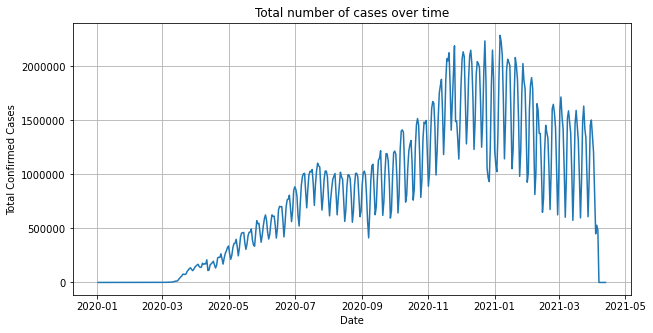

In [56]:
plt.plot(x, y)

# set labels
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
# title
plt.title('Total number of cases over time')

# fig size
plt.rcParams["figure.figsize"] = (10, 5)

plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

* This graph depicts the trend of all confirmed cases included in the dataset over the date, with each day's confirmed cases being the sum of each country's confirmed cases for each day.
* From the graph we can see that the total number of cases shows a relatively large increase from May 2020 and a sharp increase from November 2020 to January 2021, then followed by a moderation.

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [1]:
# 要仔细看数据！ hosp是当天的还在医院的人数，而不是每天新增的人数，所以不能取sum；
# 把hosp和pop都取max相除*1000，每个国家的比较，再解释 就好了

In [16]:
# data = raw_data.dropna(subset=['hosp'])
# data

In [17]:
# hosp_each_country
hosp_each_country = data.groupby('id')[['hosp']].sum()
hosp_each_country

,hosp
id,
AFG,0.0
AGO,0.0
ALB,0.0
AND,0.0
ARE,0.0
...,...
WSM,0.0
YEM,0.0
ZAF,0.0


In [18]:
# population each country
pop_each_country = data.groupby('id')[['population']].first()
pop_each_country

,population
id,
AFG,37172386
AGO,30809762
ALB,2866376
AND,77006
ARE,9630959
...,...
WSM,196130
YEM,28498687
ZAF,57779622


In [19]:
# merge
hosp_pop_countries = pd.merge(
    hosp_each_country, pop_each_country, how='left', on=['id'])
hosp_pop_countries

,hosp,population
id,,
AFG,0.0,37172386
AGO,0.0,30809762
ALB,0.0,2866376
AND,0.0,77006
ARE,0.0,9630959
...,...,...
WSM,0.0,196130
YEM,0.0,28498687
ZAF,0.0,57779622


In [20]:
# drop countries with 0 hosp; hosp need < population
hosp_pop_countries = hosp_pop_countries[(hosp_pop_countries['hosp'] > 0) & (
    hosp_pop_countries['hosp'] < hosp_pop_countries['population'])]
hosp_pop_countries

,hosp,population
id,,
AUS,43460.4,24982688
AUT,397027.0,8840521
BEL,851449.0,11433256
BGR,1058423.0,7025037
CAN,725973.0,37057765
CHL,1615651.0,18729160
CYP,25687.0,1189265
CZE,1225628.0,10629928
DNK,76796.0,5793636


id
AUS      1.739621
AUT     44.909910
BEL     74.471262
BGR    150.664402
CAN     19.590307
CHL     86.263933
CYP     21.599055
CZE    115.299746
DNK     13.255234
ESP     70.615434
EST     59.535832
FIN      8.244002
FRA    108.939880
GBR     67.073487
HRV     76.620849
HUN    126.764451
IRL     32.651512
ISL     17.243090
ISR     41.806525
ITA    112.131110
JPN     45.044136
LIE     42.838301
LTU     79.467636
LUX     60.389835
LVA     80.717154
NLD      1.589403
NOR      7.112688
PER    107.403655
POL     99.241259
PRT     62.929327
SVK     86.088437
SVN     82.257338
SWE     50.290834
THA      5.243781
USA     50.196163
dtype: float64

35

The median value is 60.38983469035283


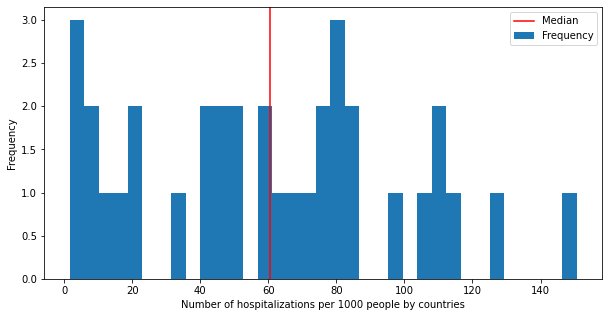

In [21]:
# calculate hosp rate
hosp_rate = hosp_pop_countries['hosp']/hosp_pop_countries['population']*1000

display(hosp_rate)
display(len(hosp_rate))

# draw hist
hosp_rate.plot.hist(bins=35, label="Frequency")
plt.xlabel('Number of hospitalizations per 1000 people by countries')

# median value line
print('The median value is', hosp_rate.median())
plt.axvline(hosp_rate.median(), color='r', linestyle='-', label="Median")
plt.legend()

* I calculated the value of hospitalizations per 1,000 population for each country, grouped by country, and drew a frequency distribution

* Value of hospitalizations per 1000 persons = total number of hospitalizations/total population * 1000.

* I obtained the hospitalization values and filtered out any outliers where the number of hospitalizations was zero or where the number of hospitalizations was greater than the total number.

* The median hospitalization value (60.38983469035283) is also plotted in the graph, indicated by the red vertical line.

In [22]:
display(hosp_rate[hosp_rate.values == hosp_rate.max()])
display(hosp_rate[hosp_rate.values == hosp_rate.min()])

id
BGR    150.664402
dtype: float64

id
NLD    1.589403
dtype: float64

* We can see that the hospitalization values per 1,000 people will be more distributed in the 0 to 20 range, and the 40 to 80 range.   

* Combining the data we know that the highest hospitalization value is BGR (Bulgaria) = 150.664402 and the lowest hospitalization value is NLD (Netherlands) = 1.589403.

In [23]:
hosp_rate.describe()

count     35.000000
mean      60.292274
std       39.250241
min        1.589403
25%       27.125284
50%       60.389835
75%       84.172887
max      150.664402
dtype: float64

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

In [24]:
# use data
data_usa = data[data['id'] == 'USA']
data_usa

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
87234,USA,2020-01-01,0.0,0,0,0,0,0.0,0,0,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87235,USA,2020-01-02,0.0,0,0,0,0,0.0,0,0,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87236,USA,2020-01-03,0.0,0,0,0,0,0.0,0,0,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87237,USA,2020-01-04,0.0,0,0,0,0,0.0,0,0,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87238,USA,2020-01-05,0.0,0,0,0,0,0.0,0,0,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87698,USA,2021-04-09,178837781.0,385064247,31084962,6298082,561074,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87699,USA,2021-04-10,183467709.0,385064247,31151495,6298082,561783,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87700,USA,2021-04-11,187047131.0,385064247,31197873,6298082,562066,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87701,USA,2021-04-12,189692045.0,385064247,31268107,6298082,562533,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US


In [25]:
# number of tests Cumulative
test_data = data_usa[['id', 'tests', 'date']]
test_data = test_data.reset_index()

In [26]:
test_data = test_data[['id', 'tests', 'date']]
test_data

,id,tests,date
0,USA,0,2020-01-01
1,USA,0,2020-01-02
2,USA,0,2020-01-03
3,USA,0,2020-01-04
4,USA,0,2020-01-05
...,...,...,...
464,USA,385064247,2021-04-09
465,USA,385064247,2021-04-10
466,USA,385064247,2021-04-11
467,USA,385064247,2021-04-12


In [27]:
# number of tests per day
test_data['test_by_day'] = [
    (test_data['tests'].iloc[i] - test_data['tests'].iloc[i-1]) for i in range(len(test_data))]
test_data

,id,tests,date,test_by_day
0,USA,0,2020-01-01,-385064247
1,USA,0,2020-01-02,0
2,USA,0,2020-01-03,0
3,USA,0,2020-01-04,0
4,USA,0,2020-01-05,0
...,...,...,...,...
464,USA,385064247,2021-04-09,0
465,USA,385064247,2021-04-10,0
466,USA,385064247,2021-04-11,0
467,USA,385064247,2021-04-12,0


The median value is 807714.5


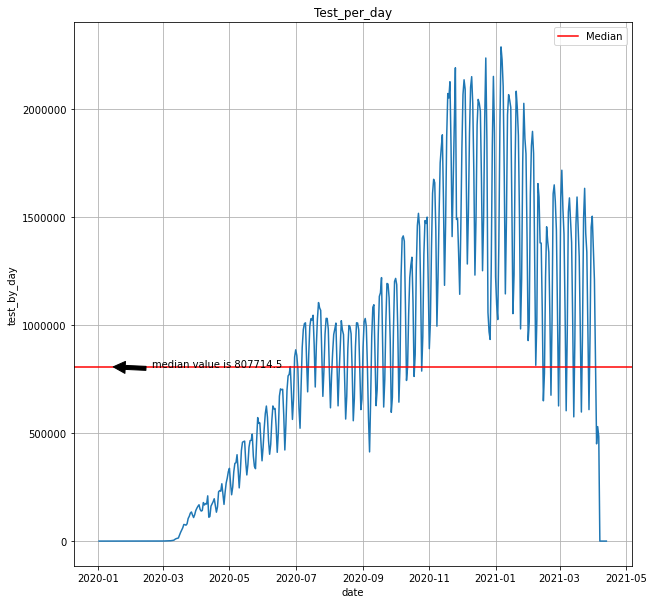

In [55]:
# drop outliers
test_data = test_data[test_data['test_by_day'] >= 0]

# draw
x = test_data['date']
y = test_data['test_by_day']

plt.plot(x, y)

# set labels
plt.xlabel('date')
plt.ylabel('test_by_day')
# title
plt.title('Test_per_day')
# fig size
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)

# plt.ticklabel_format(useOffset=False, axis='y')

# median value line
print('The median value is', test_data['test_by_day'].median())
plt.axhline(test_data['test_by_day'].median(),
            color='r', linestyle='-', label="Median")
plt.legend()

plt.annotate("median value is 807714.5",
             xytext=(test_data['date'][50], test_data['test_by_day'].median()),
             xy=(test_data['date'][10], test_data['test_by_day'].median()),
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.ticklabel_format(style='plain', axis='y')

plt.show()

* First, I filtered the USA data and extracted the tests data and date data that we needed;
* I added a column of test_by_day for each day because the tests data is cumulative;
* After discarding the outliers I drew a trend graph of the number of new tests per day for USA and drew the Median value.


* We can find that the daily number of new tests for USA starts to peak in July 2020 and continues to rise until January 2021, and then begins to slowly trend downward.


## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [29]:
canada, src = covid19("CAN", level=2, verbose=False)

In [30]:
canada.tail()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
496249,eef40c88,2022-02-04,6550.0,17.0,5581.0,39811.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496250,eef40c88,2022-02-05,6550.0,17.0,5581.0,39852.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496251,eef40c88,2022-02-06,6550.0,17.0,5581.0,39852.0,96926.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496252,eef40c88,2022-02-07,6846.0,17.0,5925.0,39878.0,97798.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1
496253,eef40c88,2022-02-08,NaN,NaN,NaN,NaN,97798.0,NaN,NaN,NaN,...,CAN,CA,124.0,CAD,61,ChIJDcHTs_Q4EVERjVnGRNguMhk,Northwest Territories,CANT,NaN,CAN.6_1


In [31]:
# canada.to_csv('canada.csv')

### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

In [32]:
canada['longitude'].max()

-56.6925764086932

In [33]:
canada['longitude'].min()

-136.804578702117

In [34]:
# Simple decimal standard == -106.346771
# Decimal Degrees (DD) == 106.3468° W
# from from west to east: from -136.804578702117 to -56.6925764086932 :
# canada['longitude'].min() to max()

In [48]:
tests_by_province = canada.groupby('administrative_area_level_2')[
    ['tests', 'longitude']].last()
tests_by_province

,tests,longitude
administrative_area_level_2,,
Alberta,6763655.0,-115.002842
British Columbia,5495428.0,-124.993506
Manitoba,1434252.0,-97.212207
New Brunswick,704856.0,-66.411970
Newfoundland and Labrador,551866.0,-56.692576
Northwest Territories,39878.0,-121.562220
Nova Scotia,1728364.0,-64.602949
Nunavut,32179.0,-100.263618
Ontario,22606233.0,-87.166464


In [49]:
# Order the provinces from west to east
tests_by_province_sorted = tests_by_province.sort_values(
    by=['longitude'], ascending=True)
tests_by_province_sorted

,tests,longitude
administrative_area_level_2,,
Yukon,9129.0,-136.804579
British Columbia,5495428.0,-124.993506
Northwest Territories,39878.0,-121.562220
Alberta,6763655.0,-115.002842
Saskatchewan,1452358.0,-105.927063
Nunavut,32179.0,-100.263618
Manitoba,1434252.0,-97.212207
Ontario,22606233.0,-87.166464
Quebec,16015314.0,-73.288937


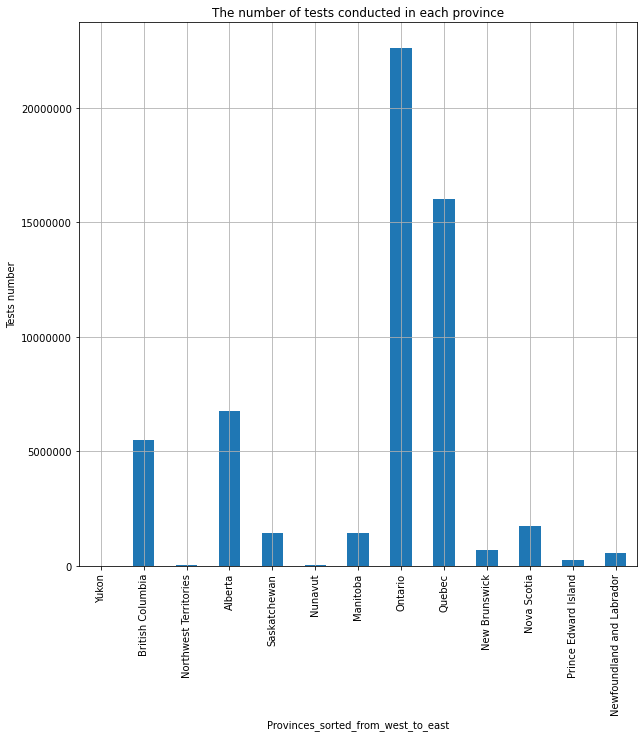

In [51]:
# plot
tests_by_province_sorted['tests'].plot(kind='bar')
# set labels
plt.xlabel('Provinces_sorted_from_west_to_east')
plt.ylabel('Tests number')
# title
plt.title('The number of tests conducted in each province')
# fig size
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(True)

# avoid le-math
plt.ticklabel_format(style='plain', axis='y')
# adjust ticks
# plt.yticks(np.arange(min(y), max(y)+1, 1000000))

plt.show()

In [69]:
# Which Canadian province that has conducted the most tests

tests_by_province_sorted.loc[tests_by_province_sorted['tests']
                             == tests_by_province_sorted['tests'].max()]

,tests,longitude
administrative_area_level_2,,
Ontario,22606233.0,-87.166464


In [70]:
tests_by_province_sorted.loc[tests_by_province_sorted['tests']
                             == tests_by_province_sorted['tests'].min()]

,tests,longitude
administrative_area_level_2,,
Yukon,9129.0,-136.804579


* We can find Ontario province has conducted the most tests: 22606233 (from both plot and code max result);
* -106.346771 in the table is the representation of the Simple decimal standard, which is equivalent to Decimal Degrees (DD) == 106.3468° W;
* If we sort the provinces from west to east, this is equivalent to sorting the longitudes from smallest to largest and plot;
* From the plot we can also find that British Columbia, Alberta, Ontario, and Quebec are the four provinces with the highest number of tests, with more than 5,000,000 tests, and these four provinces are also populous provinces in Canada.
* The other provinces have tests number below 5,000,000.

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

In [65]:
tests_population = canada.groupby('administrative_area_level_2')[
    ['tests', 'population', 'longitude']].last()
tests_population

,tests,population,longitude
administrative_area_level_2,,,
Alberta,6763655.0,4413146,-115.002842
British Columbia,5495428.0,5110917,-124.993506
Manitoba,1434252.0,1377517,-97.212207
New Brunswick,704856.0,779993,-66.411970
Newfoundland and Labrador,551866.0,521365,-56.692576
Northwest Territories,39878.0,44904,-121.562220
Nova Scotia,1728364.0,977457,-64.602949
Nunavut,32179.0,38780,-100.263618
Ontario,22606233.0,14711827,-87.166464


In [66]:
# tests conducted per 1000 people
# total_tests/total_population*1000

tests_population['tests_per_1000'] = tests_population['tests'] / \
    tests_population['population']*1000
tests_population

,tests,population,longitude,tests_per_1000
administrative_area_level_2,,,,
Alberta,6763655.0,4413146,-115.002842,1532.615282
British Columbia,5495428.0,5110917,-124.993506,1075.233270
Manitoba,1434252.0,1377517,-97.212207,1041.186425
New Brunswick,704856.0,779993,-66.411970,903.669648
Newfoundland and Labrador,551866.0,521365,-56.692576,1058.502201
Northwest Territories,39878.0,44904,-121.562220,888.072332
Nova Scotia,1728364.0,977457,-64.602949,1768.225098
Nunavut,32179.0,38780,-100.263618,829.783394
Ontario,22606233.0,14711827,-87.166464,1536.602694


,tests,population,longitude,tests_per_1000
administrative_area_level_2,,,,
Yukon,9129.0,41078,-136.804579,222.235747
British Columbia,5495428.0,5110917,-124.993506,1075.233270
Northwest Territories,39878.0,44904,-121.562220,888.072332
Alberta,6763655.0,4413146,-115.002842,1532.615282
Saskatchewan,1452358.0,1181666,-105.927063,1229.076575
Nunavut,32179.0,38780,-100.263618,829.783394
Manitoba,1434252.0,1377517,-97.212207,1041.186425
Ontario,22606233.0,14711827,-87.166464,1536.602694
Quebec,16015314.0,8537674,-73.288937,1875.840422


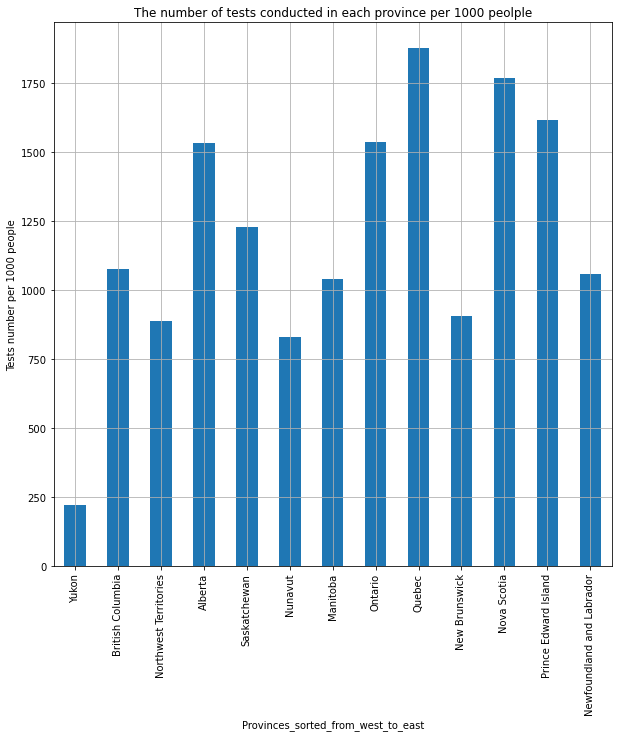

In [68]:
# Order the provinces from west to east
tests_population_sorted = tests_population.sort_values(
    by=['longitude'], ascending=True)

display(tests_population_sorted)

# plot
tests_population_sorted['tests_per_1000'].plot(kind='bar')

# set labels
plt.xlabel('Provinces_sorted_from_west_to_east')
plt.ylabel('Tests number per 1000 people')
# title
plt.title('The number of tests conducted in each province per 1000 peolple')
# fig size
plt.rcParams["figure.figsize"] = (10, 10)
plt.grid(True)

# avoid le-math
plt.ticklabel_format(style='plain', axis='y')
# adjust ticks
# plt.yticks(np.arange(min(y), max(y)+1, 1000000))

plt.show()

* This plot shows the number of tests conducted per 1000 people for each province in Canada;
* Q6's plot takes into account the population differences between provinces and calculates test data per 1000 people, which is more objective and reasonable.
* Some provinces with very small data in the Q5 plot, such as Northwest Territories, Saskatchewan, Nunavut, Manitoba, Nova Scotia, Prince Edward Island, Newfoundland and Labrador, have test data that are actually not small after using the per 1,000 population calculation method in Q6 plot.
* While both the Q5 and Q6 plots show that Yukon is the least tested province, in the Q6 plot we can see that Quebec is the most tested province per 1,000 population.

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

In [79]:
# recovery rate = total recovered / total confirmed
# get recovery_rate_table_sorted

recovery_rate_table = canada.groupby('administrative_area_level_2')[
    ['recovered', 'confirmed']].last()

recovery_rate_table['recovery_rate'] = recovery_rate_table['recovered'] / \
    recovery_rate_table['confirmed']

recovery_rate_table_sorted = recovery_rate_table.sort_values(
    by=['recovery_rate'], ascending=False)
display(recovery_rate_table_sorted)

,recovered,confirmed,recovery_rate
administrative_area_level_2,,,
Yukon,3105.0,3235.0,0.959815
Ontario,1010878.0,1056149.0,0.957136
Quebec,834633.0,883192.0,0.945019
Alberta,474284.0,508051.0,0.933536
British Columbia,306419.0,333925.0,0.917628
Saskatchewan,113023.0,123258.0,0.916963
Newfoundland and Labrador,17156.0,18740.0,0.915475
Nova Scotia,37300.0,40767.0,0.914956
New Brunswick,27298.0,31017.0,0.880098


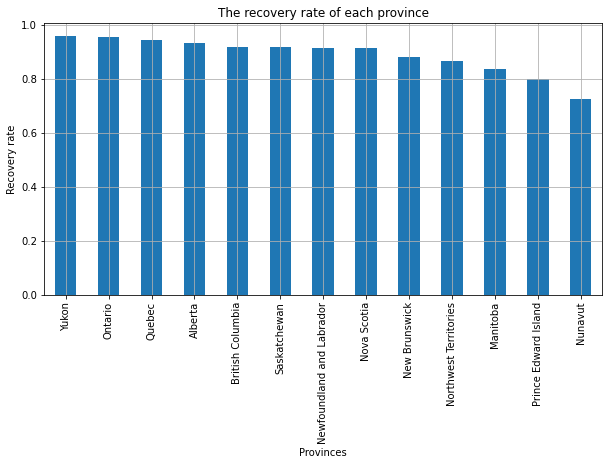

In [80]:
# plot
recovery_rate_table_sorted['recovery_rate'].plot(kind='bar')

# set labels
plt.xlabel('Provinces')
plt.ylabel('Recovery rate')
# title
plt.title('The recovery rate of each province')
# fig size
plt.rcParams["figure.figsize"] = (10, 5)
plt.grid(True)

# avoid le-math
plt.ticklabel_format(style='plain', axis='y')
# adjust ticks
# plt.yticks(np.arange(min(y), max(y)+1, 1000000))

plt.show()

* Yukon has the highest recovery rate: 0.959815;
* The plot is sorted by the recovery rate;
* recovery rate = total recovered / total confirmed;

* The overall recovery rate is high (>0.7) among these provinces;
* Nunavut has the lowest recovery rate: 0.725993.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


In [183]:
# infection rates = confirmed / population
canada['infection_rates(%)'] = (canada['confirmed'] /
                                canada['population'])*100

# get infection_rates table
infection_rates_table_1 = canada.groupby([
    'administrative_area_level_2', 'cancel_events'])[['infection_rates(%)']].mean()


# reset index
# infection_rates_table = infection_rates_table.reset_index(
#     level='cancel_events')


# drop specific geographical region (flag=0) data
# infection_rates_table = infection_rates_table[infection_rates_table['cancel_events'] >= 0]

infection_rates_table_1

infection_rates(%)
administrative_area_level_2 cancel_events                    
Alberta                      1.0                     4.120291
                             2.0                     2.341166
British Columbia            -2.0                     4.813941
                            -1.0                     0.001209
                             0.0                     4.323542
                             1.0                     3.262561
                             2.0                     0.845603
Manitoba                    -2.0                     0.332387
                             1.0                     4.798858
                             2.0                     1.277265
New Brunswick               -2.0                     0.219580
                             1.0                     0.282528
                             2.0                     0.423007
Newfoundland and Labrador   -2.0                     0.155827
                             1.0                     0.157314
                             2.0                     0.453104
Northwest Territories       -2.0                     2.857147
                             1.0                     2.059524
                             2.0                     0.025866
Nova Scotia                 -2.0                     0.154770
                             1.0                     0.347978
                             2.0                     0.752935
Nunavut                     -2.0                     1.102541
                             1.0                     0.963364
                             2.0                     0.517331
Ontario                     -2.0                     1.361921
                            -1.0                     1.644113
                             1.0                     2.557793
                             2.0                     1.856880
Prince Edward Island         1.0                     0.142220
                             2.0                     0.577032
Quebec                      -2.0                     0.000082
                             1.0                     5.043420
                             2.0                     1.879647
Saskatchewan                 1.0                     3.401117
                             2.0                     1.540261
Yukon                        1.0                     1.172969
                             2.0                     0.024768

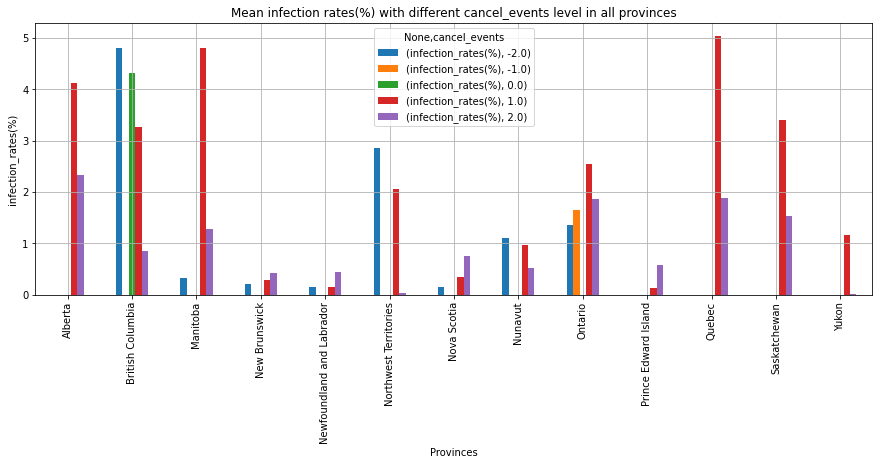

In [230]:
infection_rates_table_1.unstack().plot(kind='bar')

# set labels
plt.xlabel('Provinces')
plt.ylabel('infection_rates(%)')
# title
plt.title(
    'Mean infection rates(%) with different cancel_events level in all provinces')
# fig size
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid(True)

plt.show()

infection_rates(%)
administrative_area_level_2 workplace_closing                    
Alberta                      0.0                         4.870572
                             1.0                         6.019714
                             2.0                         3.388051
                             3.0                         0.053726
British Columbia             0.0                         2.704349
...                                                           ...
Saskatchewan                 3.0                         0.036787
Yukon                       -2.0                         0.022350
                            -1.0                         1.886100
                             0.0                         0.000000
                             1.0                         0.971495

[69 rows x 1 columns]

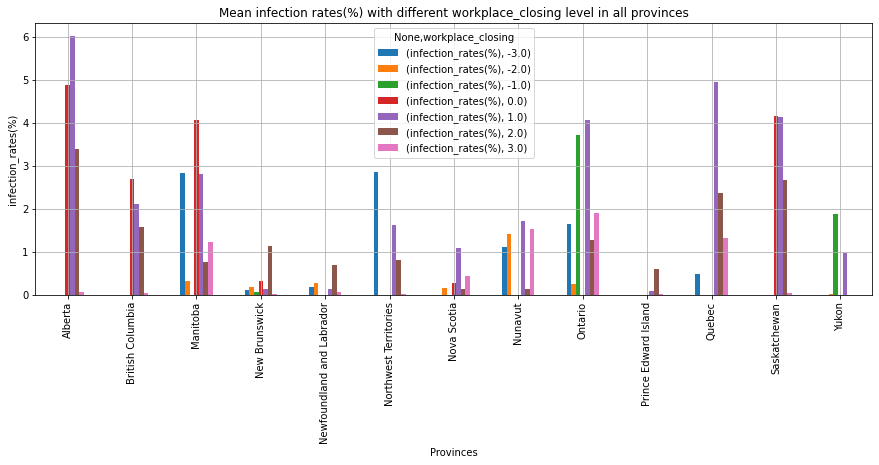

In [231]:
# get infection_rates table
infection_rates_table_2 = canada.groupby([
    'administrative_area_level_2', 'workplace_closing'])[['infection_rates(%)']].mean()

display(infection_rates_table_2)

# plot
infection_rates_table_2.unstack().plot(kind='bar')

# set labels
plt.xlabel('Provinces')
plt.ylabel('infection_rates(%)')
# title
plt.title(
    'Mean infection rates(%) with different workplace_closing level in all provinces')
# fig size
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid(True)

plt.show()

infection_rates(%)
administrative_area_level_2 stay_home_restrictions                    
Alberta                     -1.0                              1.393947
                             0.0                              1.601840
                             1.0                              4.910842
British Columbia            -2.0                              0.407644
                             0.0                              0.674971
                             1.0                              2.424252
Manitoba                    -2.0                              2.334568
                             0.0                              6.586772
                             1.0                              2.373281
                             2.0                              1.651750
New Brunswick               -2.0                              0.194858
                            -1.0                              0.197613
                             0.0                              0.052350
                             1.0                              0.809836
                             2.0                              0.010470
Newfoundland and Labrador   -2.0                              0.224180
                            -1.0                              0.336857
                             0.0                              0.000000
                             1.0                              0.266930
                             2.0                              0.177172
Northwest Territories       -2.0                              3.406493
                             0.0                              0.037430
                             1.0                              1.726910
Nova Scotia                 -1.0                              0.235725
                             0.0                              0.238295
                             1.0                              0.650318
                             2.0                              0.045826
Nunavut                     -2.0                              1.034932
                             0.0                              1.760358
                             1.0                              0.944788
                             2.0                              0.574013
Ontario                     -2.0                              2.003463
                            -1.0                              1.083663
                             0.0                              0.563883
                             1.0                              3.205810
                             2.0                              2.460352
Prince Edward Island         0.0                              0.000211
                             1.0                              0.252570
                             2.0                              0.061421
Quebec                      -2.0                              0.473988
                             0.0                              0.866637
                             1.0                              3.456298
                             2.0                              3.261173
Saskatchewan                 0.0                              2.185617
                             1.0                              2.632852
Yukon                        0.0                              0.334970
                             1.0                              1.848513

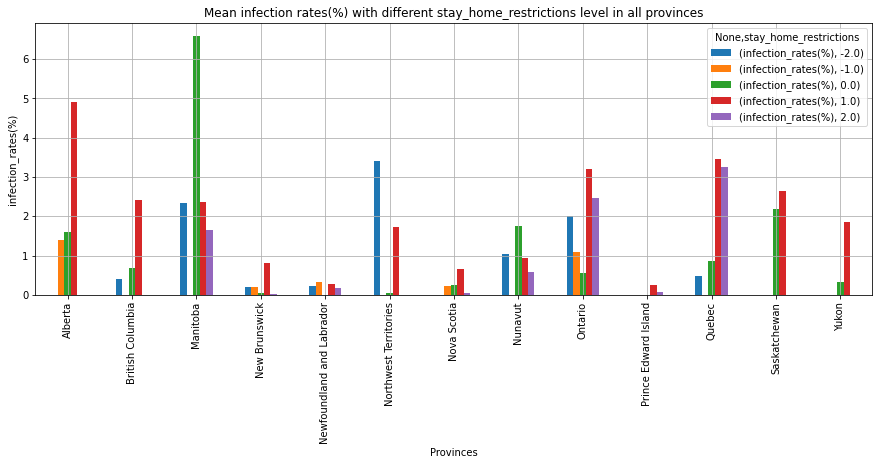

In [229]:
# get infection_rates table
infection_rates_table_3 = canada.groupby([
    'administrative_area_level_2', 'stay_home_restrictions'])[['infection_rates(%)']].mean()

display(infection_rates_table_3)

# plot
infection_rates_table_3.unstack().plot(kind='bar')

# set labels
plt.xlabel('Provinces')
plt.ylabel('infection_rates(%)')
# title
plt.title('Mean infection rates(%) with different stay_home_restrictions level in all provinces')
# fig size
plt.rcParams["figure.figsize"] = (15, 5)
plt.grid(True)

plt.show()

In [266]:
policy1_level0

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm,infection_rates(%)
275596,83fc0fa9,2020-01-31,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,0.000020
275597,83fc0fa9,2020-02-08,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,0.000020
275598,83fc0fa9,2020-02-16,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,0.000020
275599,83fc0fa9,2020-02-21,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,0.000020
275600,83fc0fa9,2020-02-24,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276293,83fc0fa9,2022-01-21,984359.0,10865.0,898589.0,22149074.0,29872383.0,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,6.690936
276294,83fc0fa9,2022-01-22,990832.0,10912.0,908533.0,22190612.0,29977268.0,12353617.0,11569006.0,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,6.734935
276295,83fc0fa9,2022-01-23,996665.0,10968.0,918023.0,22190612.0,30056293.0,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,6.774583
276296,83fc0fa9,2022-01-24,1001455.0,11004.0,924947.0,22259255.0,30100272.0,NaN,NaN,NaN,...,CA,124.0,CAD,35,ChIJrxNRX7IFzkwRCR5iKVZC-HA,Ontario,CAON,NaN,CAN.9_1,6.807142


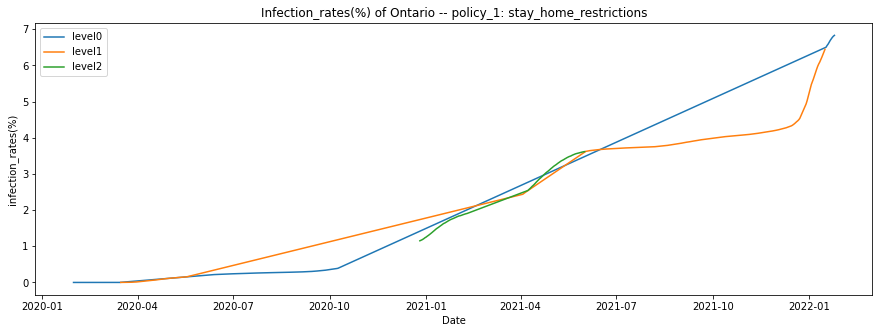

In [272]:
# take Ontario for example -- policy 1: stay_home_restrictions


policy1_level0 = canada[(canada['stay_home_restrictions'] == 0.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy1_level1 = canada[(canada['stay_home_restrictions'] == 1.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy1_level2 = canada[(canada['stay_home_restrictions'] == 2.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]


policy1 = [policy1_level0, policy1_level1, policy1_level2]

for i in range(len(policy1)):
    x = policy1[i]['date']
    y = policy1[i]['infection_rates(%)']
    plt.plot(x, y, label=f'level{i}')

plt.legend()

# set labels
plt.xlabel('Date')
plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) of Ontario -- policy_1: stay_home_restrictions')

plt.show()

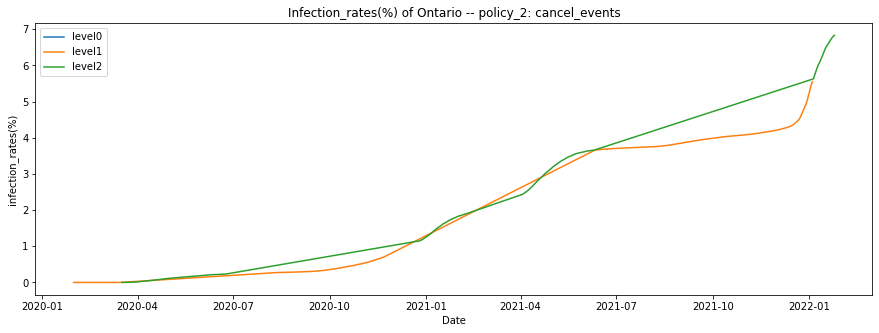

In [270]:
# take Ontario for example -- policy 2: cancel_events


policy2_level0 = canada[(canada['cancel_events'] == 0.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy2_level1 = canada[(canada['cancel_events'] == 1.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy2_level2 = canada[(canada['cancel_events'] == 2.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]


policy2 = [policy2_level0, policy2_level1, policy2_level2]

for i in range(len(policy2)):
    x = policy2[i]['date']
    y = policy2[i]['infection_rates(%)']
    plt.plot(x, y, label=f'level{i}')

plt.legend()

# set labels
plt.xlabel('Date')
plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) of Ontario -- policy_2: cancel_events')

plt.show()

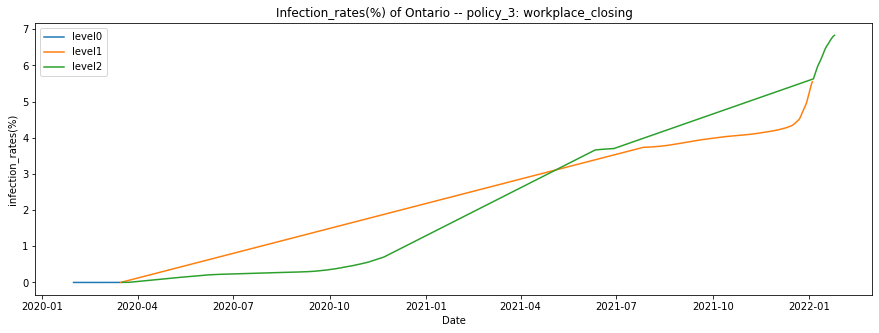

In [274]:
# # take Ontario for example -- policy 3: workplace_closing


policy3_level0 = canada[(canada['workplace_closing'] == 0.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy3_level1 = canada[(canada['workplace_closing'] == 1.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]
policy3_level2 = canada[(canada['workplace_closing'] == 2.0) & (
    canada['administrative_area_level_2'] == 'Ontario')]


policy3 = [policy3_level0, policy3_level1, policy3_level2]

for i in range(len(policy3)):
    x = policy3[i]['date']
    y = policy3[i]['infection_rates(%)']
    plt.plot(x, y, label=f'level{i}')

plt.legend()

# set labels
plt.xlabel('Date')
plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) of Ontario -- policy_3: workplace_closing')

plt.show()

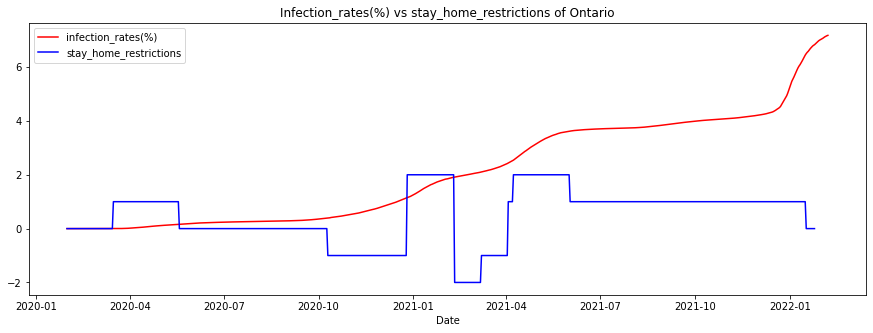

In [278]:
ontario = canada[canada['administrative_area_level_2'] == 'Ontario']

# policy 1: stay_home_restrictions

x = ontario['date']
y1 = ontario['infection_rates(%)']
y2 = ontario['stay_home_restrictions']
plt.plot(x, y1, 'r', label='infection_rates(%)')
plt.plot(x, y2, 'b', label='stay_home_restrictions')

plt.legend()

# set labels
plt.xlabel('Date')
# plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) vs stay_home_restrictions of Ontario')

plt.show()

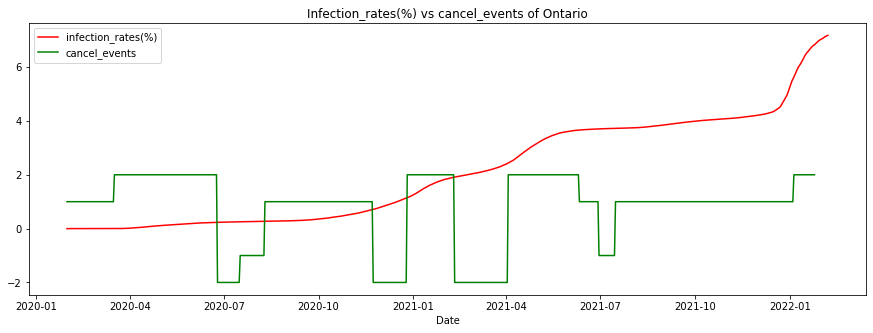

In [280]:
# policy 2: cancel_events

x = ontario['date']
y1 = ontario['infection_rates(%)']
y2 = ontario['cancel_events']
plt.plot(x, y1, 'r', label='infection_rates(%)')
plt.plot(x, y2, 'g', label='cancel_events')

plt.legend()

# set labels
plt.xlabel('Date')
# plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) vs cancel_events of Ontario')

plt.show()

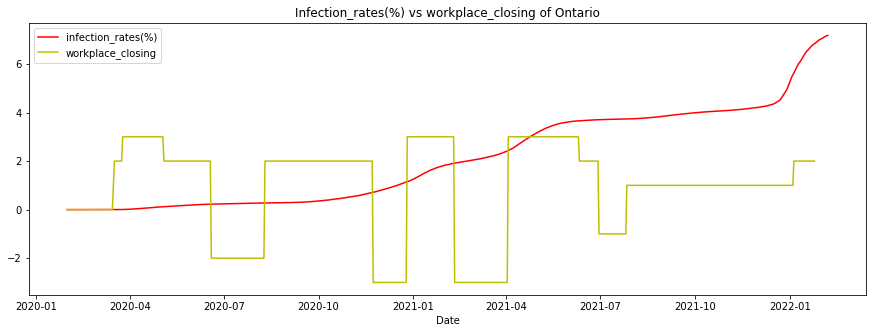

In [285]:
# policy 3: workplace_closing

x = ontario['date']
y1 = ontario['infection_rates(%)']
y2 = ontario['workplace_closing']
plt.plot(x, y1, 'r', label='infection_rates(%)')
plt.plot(x, y2, 'y', label='workplace_closing')

plt.legend()

# set labels
plt.xlabel('Date')
# plt.ylabel('infection_rates(%)')
# title
plt.title('Infection_rates(%) vs workplace_closing of Ontario')

plt.show()

*  Infection rates = confirmed / population;   

* I have plotted the mean infection rates (%) in all provinces under the influence of different policy levels with three policies:    
1. cancel_events   
2. workplace_closing    
3. stay_home_restrictions   

* It can be found that in most cases, the mean infection rates(%) at level=2 are lower than those at level=1 or level=0, which indicates that strict policy restriction of level is useful.   

* After that, I plotted the trend of Infection_rates(%) over time at different restriction levels with each of the above three policies using Ontario as an example.
1. cancel_events
2. workplace_closing
3. stay_home_restrictions

* Finally, Iplotted the trend of Infection_rates(%) versus policy level over time for the three policies, using Ontario as example.   

* From this, we can find that:   
1. The time of strict implementation (have higher policy level) of these three policies shows almost the same trend, indicating that generally when the epidemic is serious, multiple policy restrictions will be issued at once;   
2. After the policy is not strict for a period of time, the infection rate will rise rapidly, then the policy becomes strict, the growth rate of the infection rate will slow down, then the policy becomes less strict, then the infection rate will accelerate again, this is like a cycle, which is interesting.    

* In summary, we can conclude that the policy restriction has a clear positive effect on the reduction of infection rate.







## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>